## Chapter 9 :  Orthogonalization :

In [15]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from numpy.linalg import norm
import mayavi.mlab as m


#### Compute the projection coefficient of two vectors :

In [25]:
def coefficient(v,u):
    scalar_product = np.dot(v,u)
    norm_squared = np.dot(u,u)    
    return float(scalar_product/norm_squared)

#### Normalizing a vector subject to the L2 norm :

In [66]:
def normalizer(u):
    norm = np.linalg.norm(u,2)
    if norm != 0. :
        return u/norm
    else:
        return u

#### The gram schmidt algorithm for three vectors:

In [67]:
def gram_schmidt_3D(v1,v2,v3,coefficient,normalizer):
    ## Initialisation :
    u1 = v1
    e1 = normalizer(u1)
    print('u1:',u1)
    print('the normalized u1:',e1)
    ## first iteration:
    u2 = v2 - np.multiply(coefficient(v2,u1),u1)
    e2 = normalizer(u2)
    print('u2:',u2)
    print('the normalized u2:',e2)
    ## Second iteration:
    u3 = v3 - np.multiply(coefficient(v3,u1),u1) - np.multiply(coefficient(v3,u2),u2)
    e3 = normalizer(u3)
    print('u3:',u3)
    print('the normalized u3:',e3)
    
    return e1 , e2 , e3    

### Plotting the vectors:

In [68]:
def plot_GS(p1,p2,p3):
    e1,e2,e3 = gram_schmidt_3D(p1,p2,p3,coefficient,normalizer)
    origin = [0,0,0]
    X, Y, Z = zip(origin,origin,origin) 
    e1, e2, e3 = zip(e1,e2,e3)
    V1, V2, V3 = zip(p1,p2,p3)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X,Y,Z,e1,e2,e3,arrow_length_ratio=0.1)
    ax.quiver(X,Y,Z,V1,V2,V3,arrow_length_ratio=0.1,color='red')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

### Testing :

#### Orthogonal basis :

u1: [0, 0, 1]
the normalized u1: [0. 0. 1.]
u2: [0. 1. 0.]
the normalized u2: [0. 1. 0.]
u3: [1. 0. 0.]
the normalized u3: [1. 0. 0.]


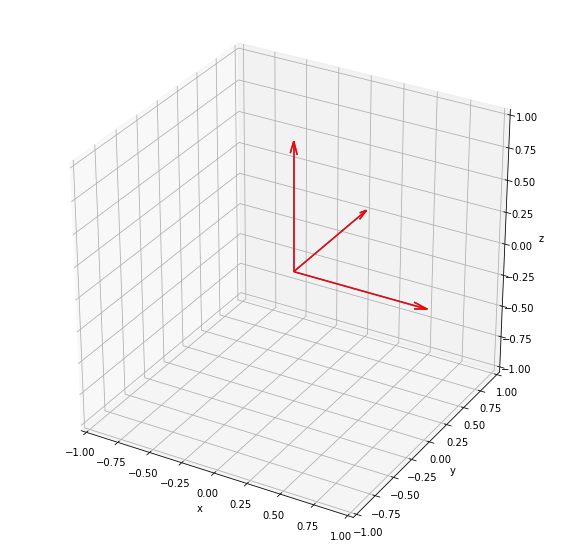

In [69]:
plot_GS([0,0,1],[0,1,0],[1,0,0])

#### Lineary dependent vectors :

u1: [1, 1, 0]
the normalized u1: [0.70710678 0.70710678 0.        ]
u2: [-0.5  0.5  0. ]
the normalized u2: [-0.70710678  0.70710678  0.        ]
u3: [0. 0. 0.]
the normalized u3: [0. 0. 0.]


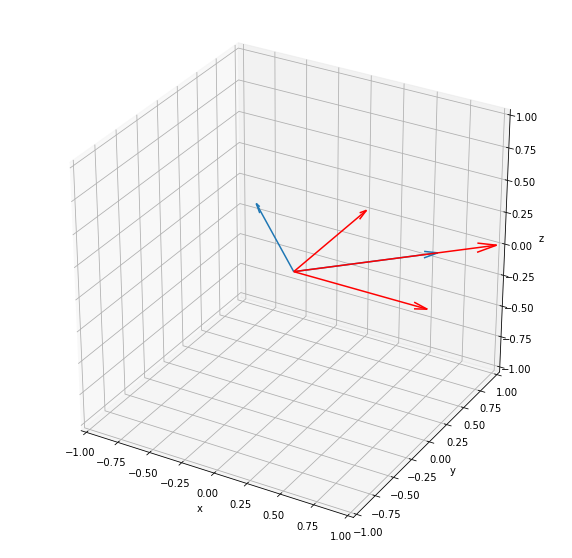

In [70]:
plot_GS([1,1,0],[0,1,0],[1,0,0])